In [1]:
!pip3 install netCDF4 xarray matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.2/214.2 kB 20.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# NetCDFファイルのパス
nc_file_path = './../../data/GISTEMP v4 data.nc'

# NetCDFファイルを読み込む
ds = xr.open_dataset(nc_file_path)

# データセットの情報を表示
print(ds)


<xarray.Dataset> Size: 113MB
Dimensions:      (lat: 90, lon: 180, time: 1736, nv: 2)
Coordinates:
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2024-08-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 28kB ...
    tempanomaly  (time, lat, lon) float32 112MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-09-08 11:48:21 by SBBX_to_nc 2.0 - ILAND=1200,...


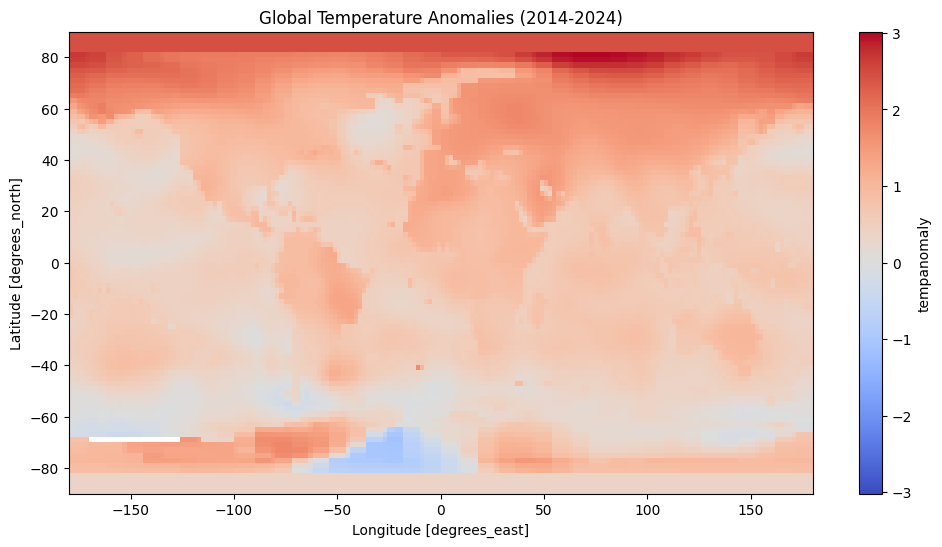

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# データの読み込み
ds = xr.open_dataset('./../../data/GISTEMP v4 data.nc')

# 過去10年間のデータを抽出
start_date = '2000-01-01'
end_date = '2020-12-31'
past_10_years = ds.sel(time=slice(start_date, end_date))

# 平均気温異常を計算
avg_temp_anomaly = past_10_years['tempanomaly'].mean(dim='time')

# プロット
plt.figure(figsize=(12, 6))
avg_temp_anomaly.plot(cmap='coolwarm')
plt.title('Global Temperature Anomalies (2014-2024)')
plt.show()

In [15]:
import numpy as np
import xarray as xr
import folium
from folium.plugins import HeatMap

# GISTEMPデータの読み込み
data = xr.open_dataset('./../../data/GISTEMP v4 data.nc')

# 2000年以降のデータを抽出
data_after_2000 = data.sel(time=slice('2000-01-01', '2024-12-31'))

# 必要な変数の取り出し（例: lat, lon, tempanomaly）
lat = data_after_2000['lat'].values
lon = data_after_2000['lon'].values
temp_anomaly = data_after_2000['tempanomaly'].mean(dim='time').values  # 平均異常値

# float32をfloat64に変換（foliumで扱うため）
lat = lat.astype(np.float64)
lon = lon.astype(np.float64)
temp_anomaly = temp_anomaly.astype(np.float64)

# ヒートマップ用のデータを準備
heat_data = []
for i in range(len(lat)):
    for j in range(len(lon)):
        # 温度異常がNaNでないデータのみを追加
        if not np.isnan(temp_anomaly[i][j]):
            heat_data.append([lat[i], lon[j], temp_anomaly[i][j]])

# 中心の座標を指定して、Foliumマップの作成
m = folium.Map(location=[0, 0], zoom_start=2)

# ヒートマップの追加
HeatMap(heat_data, radius=10, max_zoom=1).add_to(m)

# マップを表示
m

In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

# データの読み込み
ds = xr.open_dataset('./../../data/GISTEMP v4 data.nc')

# 過去10年間のデータを抽出
start_date = '2000-01-01'
end_date = '2020-12-31'
past_10_years = ds.sel(time=slice(start_date, end_date))

# 平均気温異常を計算
avg_temp_anomaly = past_10_years['tempanomaly'].mean(dim='time')

# グラフをプロットして保存する関数
def plot_temp_anomaly():
    plt.figure(figsize=(12, 6))
    avg_temp_anomaly.plot(cmap='coolwarm')
    plt.title('Global Temperature Anomalies (2000-2020)')
    
    # グラフを画像として保存
    plt.savefig('temp_anomaly_plot.png')
    plt.close()  # プロットを閉じておく
    return 'temp_anomaly_plot.png'

# Gradioインターフェースの設定
iface = gr.Interface(fn=plot_temp_anomaly, 
                     inputs=[], 
                     outputs="image",
                     title="Global Temperature Anomalies (2000-2020)",
                     description="過去10年間の気温異常を表示します。")

# Gradioの実行
iface.launch()

/Users/yuzu/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7881

To create a public link, set `share=True` in `launch()`.
